# Credit Fraud Analysis

Prathvik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
data=pd.read_csv('Fraud.csv')

**Sample data- first 5 rows**

In [3]:
(data.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


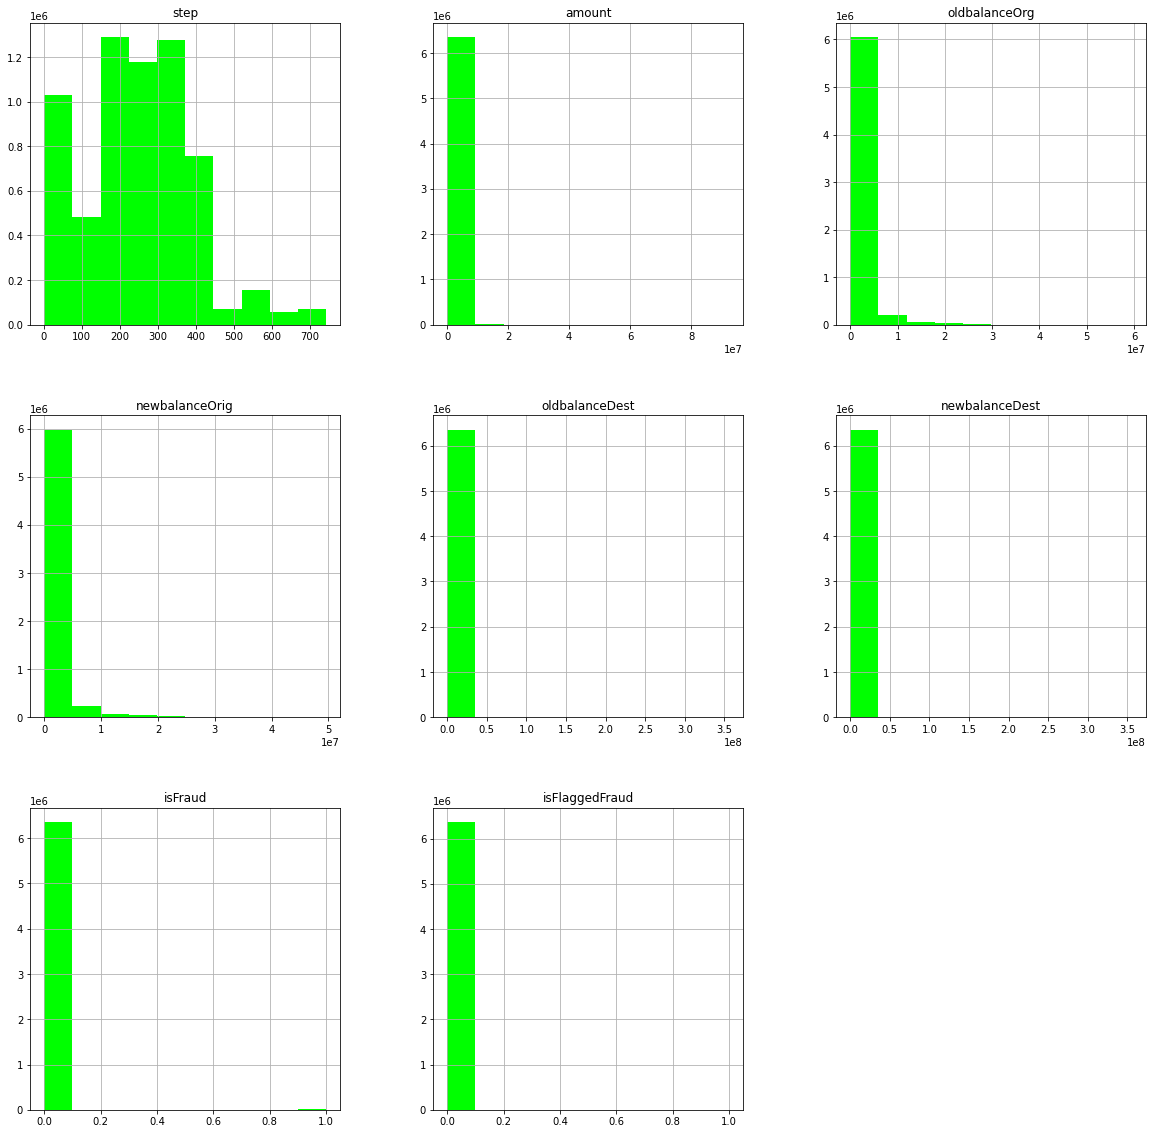

In [4]:
data.hist(figsize=(20,20),color='lime')
plt.show()

<AxesSubplot:>

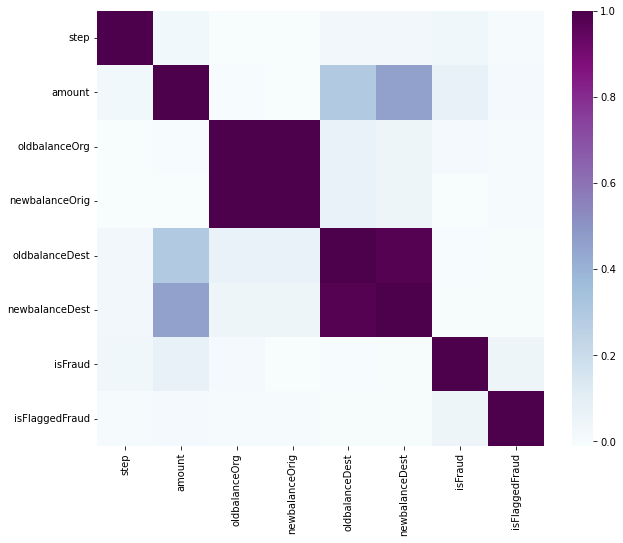

In [5]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

# Data Cleaning

**Deleting the useless columns, we can drop the nameOrg and nameDest column as it does not really give any insight, moreover if we want to keep it then we have to use one hot encoding which will lead to huge number of feature columns, so we better drop them**

*Dropping the nameOrig column*

In [6]:
data=data.drop('nameOrig',axis=1)

In [7]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0


*Dropping the nameDest column*

In [8]:
data=data.drop('nameDest',axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


**Taking the target variable in y**

In [9]:
y=data.iloc[:,-2].values

In [10]:
sizes = [np.count_nonzero(y==0),np.count_nonzero(y==1)]

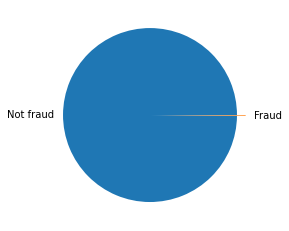

In [11]:
plt.pie(sizes,labels=["Not fraud","Fraud"],explode=[0.1,0])
plt.show()

We can see that the number of transactions which are fradulent are very less leading to unbalanced data

In [12]:
data=data.drop('isFraud',axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


**The independent variables in array x**

In [13]:
x=data.iloc[:,:].values

In [14]:
print(x[0:2])

[[1 'PAYMENT' 9839.64 170136.0 160296.36 0.0 0.0 0]
 [1 'PAYMENT' 1864.28 21249.0 19384.72 0.0 0.0 0]]


In [15]:
print(f"{np.shape(x)} is the shape of the feature matrix")

(6362620, 8) is the shape of the feature matrix


**Encoding the categorical data, the column with type, we use onehot encoding here**\
There are 5 types\
\
*CASH-IN\
CASH-OUT\
DEBIT\
PAYMENT\
TRANSFER*

So 5 columns will be created

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [17]:
print(x[0:5])#the first 5 rows

[[0.0 0.0 0.0 1.0 0.0 1 9839.64 170136.0 160296.36 0.0 0.0 0]
 [0.0 0.0 0.0 1.0 0.0 1 1864.28 21249.0 19384.72 0.0 0.0 0]
 [0.0 0.0 0.0 0.0 1.0 1 181.0 181.0 0.0 0.0 0.0 0]
 [0.0 1.0 0.0 0.0 0.0 1 181.0 181.0 0.0 21182.0 0.0 0]
 [0.0 0.0 0.0 1.0 0.0 1 11668.14 41554.0 29885.86 0.0 0.0 0]]


**Taking care of missing values, we use most frequent values to fill the missing values as the data set is unbalanced**

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(x[:, 0:8])
x[:, 0:8] = imputer.transform(x[:, 0:8])

**Splitting the dataset into training set and test set, here we take 80% of the data for training and remainig 20% to test**

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [20]:
print(np.shape(x_train))
print(np.shape(x_test))

(5726358, 12)
(636262, 12)


**Feature scaling**

*Here we use feature scaling for the algorithms to work faster, the range of data specially in the columns "newbalanceOrig" and "oldbalanceOrg" is huge and we standardise the data, formula is*
$$x'=\frac{x-\mu}{\sigma} $$
$\mu$-mean\
$\sigma$-standard deviation

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, :] = sc.fit_transform(x_train[:, :])
x_test[:, :] = sc.transform(x_test[:, :])

In [22]:
x_train[0]

array([-0.5310542627103866, -0.7364779282953943, -0.0809336349431559,
       -0.7146358026588823, 3.3066321010532813, 0.2851755817619071,
       1.3554751025061231, -0.2887241438971738, -0.2924480445854368,
       0.10999628323687836, 0.33933980485513593, -0.001671557614251173],
      dtype=object)

# **Building and training the model**

*Model building and model selection*

**Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\Prathvik G S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is\n {cm}")
print(f"The F1 score is {f1_score(y_test,y_pred)}")
print(f"The accuracy score is {accuracy_score(y_test,y_pred)}")

The confusion matrix is
 [[635406     30]
 [   452    374]]
The F1 score is 0.608130081300813
The accuracy score is 0.999242450437084


**Random forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [27]:
y_pred2=classifier2.predict(x_test)

In [28]:
cm2 = confusion_matrix(y_test, y_pred2)
print(f"The confusion matrix is\n {cm2}")
print(f"The F1 score is {f1_score(y_test,y_pred2)}")
print(f"The accuracy score is {accuracy_score(y_test,y_pred2)}")

The confusion matrix is
 [[635423     13]
 [   175    651]]
The F1 score is 0.8738255033557046
The accuracy score is 0.999704524236871
